Импорт нужных библиотек

In [1]:
import keras

In [2]:
import os, shutil

In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import zipfile
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt

Распаковка архива и извлечение данных:

In [4]:
with zipfile.ZipFile('dogs-vs-cats.zip') as zf: 
    zf.extractall('all')

In [5]:
with zipfile.ZipFile('all/train.zip') as zf: 
    zf.extractall()

Образование нового, меньшего набора, состоящего из трёх поднаборов: тренировочный, валидационный и тренировочный

In [6]:
#Путь к папке, в которую был распакован исходный набор данных
original_dataset_dir = '/Users/Arsen/Downloads/Deep Learning/_ArsenDL/train'

#Путь к папке, в которой мы сделаем набор данных поменьше
base_dir = '/Users/Arsen/Downloads/Deep Learning/_ArsenDL/cats_and_dogs_small'
os.mkdir(base_dir)

#Папки для тренировочной, валидационной и тестовой выборок
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Папка с изображениями котов для тренировочной выборки
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#Папка с изображениями собак для тренировочной выборки
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#Папка с изображениями котов для валидационной выборки
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#Папка с изображениями котов для валидационной выборки
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Папка с изображениями котов для тестовой выборки
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#Папка с изображениями котов для тестовой выборки
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#Копируем первую 1000 изображений с котами в train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#Копируем следующие 500 изображений с котами в validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#И ещё 500 изображений с котами копируем в test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#Копируем первую 1000 изображений с собаками в train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#Копируем следующие 500 изображений с собаками в validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#И ещё 500 изображений с собаками копируем в test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Модель небольшой свёрточной нейронной сети

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Настройка модели для обучения

In [8]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

Преобразование изображений в тензоры с вещественными числами

In [9]:
from keras.preprocessing.image import ImageDataGenerator

#Все изображения будут масштабированы с коэффициентом 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #Все изображения будут приведены к размеру 150х150
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Обучение модели при помощи генератора пакетов

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

<ipython-input-10-a7acfc8093a4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 85s 838ms/step - loss: 0.6864 - acc: 0.5530 - val_loss: 0.6740 - val_acc: 0.5740
Epoch 2/30
100/100 [==============================] - 63s 635ms/step - loss: 0.6565 - acc: 0.6025 - val_loss: 0.6410 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 64s 636ms/step - loss: 0.6140 - acc: 0.6685 - val_loss: 0.6898 - val_acc: 0.5780
Epoch 4/30
100/100 [==============================] - 65s 654ms/step - loss: 0.5712 - acc: 0.7010 - val_loss: 0.5970 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 64s 639ms/step - loss: 0.5316 - acc: 0.7340 - val_loss: 0.6074 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 68s 677ms/step - loss: 0.5013 - acc: 0.7610 - val_loss: 0.5765 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 64s 639ms/step - loss: 0.4730 - acc: 0.7695 - val_loss: 0.5609 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 7

Сохранение модели

In [11]:
model.save('cats_and_dogs_small_1.h5')

Построение графиков изменения потерь и точности во время обучения

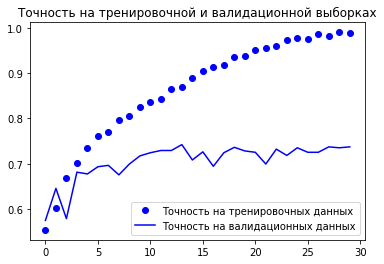

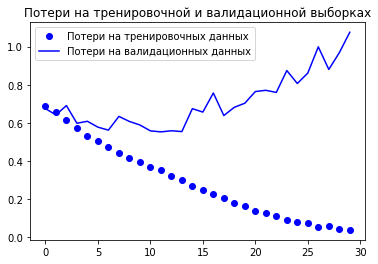

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Точность на тренировочных данных')
plt.plot(epochs, val_acc, 'b', label='Точность на валидационных данных')
plt.title('Точность на тренировочной и валидационной выборках')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Потери на тренировочных данных')
plt.plot(epochs, val_loss, 'b', label='Потери на валидационных данных')
plt.title('Потери на тренировочной и валидационной выборках')
plt.legend()

plt.show()

Обучение окончательной версии модели

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=4,
      validation_data=validation_generator,
      validation_steps=50)

model.save('cats_and_dogs_small_1_1.h5')

Epoch 1/4


<ipython-input-13-a090d322df4d>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 71s 701ms/step - loss: 0.6883 - acc: 0.5455 - val_loss: 0.6634 - val_acc: 0.6020
Epoch 2/4
100/100 [==============================] - 85s 851ms/step - loss: 0.6577 - acc: 0.5900 - val_loss: 0.6447 - val_acc: 0.5900
Epoch 3/4
100/100 [==============================] - 83s 827ms/step - loss: 0.6006 - acc: 0.6680 - val_loss: 0.6169 - val_acc: 0.6340
Epoch 4/4
100/100 [==============================] - 82s 816ms/step - loss: 0.5690 - acc: 0.7035 - val_loss: 0.5959 - val_acc: 0.6730


In [14]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Точность: ', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 15s 309ms/step - loss: 0.6017 - acc: 0.6860
Точность:  0.6859999895095825
